![alt-text](https://d26a57ydsghvgx.cloudfront.net/product/Customer%20Story%20Images/CIRCLES%20Logo%20Inline%20Colour.png)

# Circles.Life Data Assignment

By: Valerie Lim
Date: 13 February 2018 
Language: Python 3.6 

In [1]:
# Set up current directory
import os 
directory = "C:\\Users\\valeriehy.lim\\Documents\\Google Admin\\Apps\\w Circles.Life"
os.chdir(directory)

# Q1: Which brewery produces the strongest beers by % ABV?

Assumptions:

* Data for %ABV stored in `beer_abv` column 
* Each brewery produces many beers, therefore the *average* of all beers produced will be taken.  

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

file = pd.read_csv("beer_reviews.csv")

In [3]:
output = file.groupby('brewery_name').aggregate({'beer_abv':'mean'}).sort_values('beer_abv', ascending = False)
output.head(5)

,beer_abv
brewery_name,
Schorschbräu,19.228824
Shoes Brewery,15.200000
Rome Brewing Company,13.840000
Hurlimann Brewery,13.750000
Alt-Oberurseler Brauhaus,13.200000


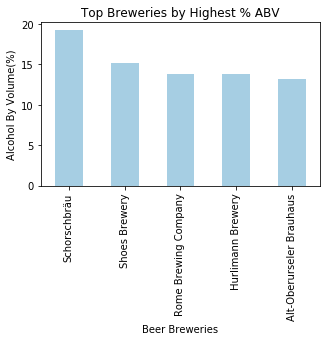

In [4]:
# show only top 5 breweries in graph
graph = output[0:5]
ax = graph['beer_abv'].plot(kind='bar', title ="Top Breweries by Highest % ABV", 
                            figsize=(5, 3), legend=False, colormap='Paired')
ax.set_xlabel("Beer Breweries", fontsize=10)
ax.set_ylabel("Alcohol By Volume(%)", fontsize=10)
plt.show()

# Answer: Schorschbräu Brewery (19.2%)

Note: Some breweries are missing information on `beer %ABV`.

# Q2: If you had to pick 3 beers to recommend using only this data, which would you pick?

This is fun! 

Let's say I have three friends - I'd try to pick a beer suited for each of their 'personalities', and make up some funny filters along the way.

1. The **milennial** - wants something 'edgy', actually knows nothing about beer, will probably instagram the bottle
* The **hipster** - complains "its too mainstream" if too many people know about it, wants "locally sourced" or "craft beers"
* The **"anything is fine"** pal - Not picky, wants a general crowd pleaser, secretly can't hold their alcohol

![alt-text](https://d1ynl4hb5mx7r8.cloudfront.net/wp-content/uploads/2015/10/09164321/Beer_photograph.jpg)

# Q2A: The Milennial

* Wants something 'edgy'
* Knows nothing about beer
* Will instagram the bottle

**Approach: I'd choose the bottle with an appearance score above 4.5/5.0 stars, followed by the worst taste (irony).**

In [5]:
milennial = file.groupby('beer_beerid').aggregate({'review_taste': 'mean', 'review_appearance': 'mean'})
pretty_bottles = milennial[(milennial['review_appearance'] > 4.5)]
pretty_bottles.sort_values(by='review_taste', ascending = True).head()

,review_taste,review_appearance
beer_beerid,,
72084,1.0,5.0
71779,1.5,5.0
57292,2.0,5.0
72093,2.0,5.0
63794,2.0,5.0


### Wow 1.0 for taste? That's sad and hilarious. I'd take it. Let's see who it is:

In [6]:
file[file['beer_beerid'] == 72084]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
951874,16236,Guangdong Blue Ribbon Group,1313340782,2.0,5.0,5.0,woodychandler,Fruit / Vegetable Beer,3.0,1.0,Lanbei Pineapple Taste,NaN,72084


![alt-text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShxg8LlcucCroYA-GVWLbWKITkFM3JjGAlWCnFg6XwLK6cH1a25w)

# Winner of shitty choice awards for prettiest bottle, with worst-tasting beer, goes to: the Fruit/Vegetable Beer, of Guang Dong Blue Ribbon Group! 

# Q2B: The hipster

![alt-text](https://images.theconversation.com/files/46324/original/wp7yf4wc-1397450071.jpg "darn hipsters!")

* Complains "its too mainstream" if too many people know about it
* Wants "locally sourced" or "craft beers"

**Approach: I'd select a beer with "locally sourced" or "craft" in its name, and that has less than 1,000 reviews, out of which still has the highest overall rating.**

In [7]:
file[file['beer_style'].str.contains("craft|local")==True]
file[file['beer_name'].str.contains("craft|local")==True]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
917091,2976,Pints Pub and Brewery and Freehouse,1221166499,4.0,3.5,3.5,Seanibus,American Blonde Ale,4.0,4.0,Bitchcraft Blonde,NaN,44824


### Wow... Seems like only ONE beer contains 'craft' its name - the Bitchcraft Blonde by American Blonde Ale company. So I guess this criteria to filter is out.

I'll continue with selecting unknown beers for my hipster friend to try.


In [8]:
beer_counts = file.groupby('beer_beerid').aggregate({'review_overall': 'count'})
x = beer_counts[(beer_counts['review_overall'] < 1000) &
                (beer_counts['review_overall'] > 100)] # let's be reasonable, your friend is not THAT hipster
# This leaves 2883 beer types

# Subset file with only the unknown beer names, between 100 - 1000 reviews exactly
x.reset_index(level=0, inplace=True) 
top_beers = x['beer_beerid'].tolist()
filtered = file[file['beer_beerid'].isin(top_beers)]
scores = filtered.groupby('beer_beerid').aggregate({'review_overall': 'mean'})
scores.sort_values(by='review_overall', ascending = False).head()

,review_overall
beer_beerid,
56082,4.630952
36316,4.628205
16814,4.625800
41928,4.620536
21690,4.600000


In [9]:
# check out some reviews! 
file[file['beer_beerid']==56082].head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
334855,14064,Kern River Brewing Company,1282177258,4.0,4.0,4.0,beerwolf77,American Double / Imperial IPA,4.0,4.0,Citra DIPA,8.0,56082
334927,14064,Kern River Brewing Company,1314471420,4.5,4.5,4.0,zoolzoo,American Double / Imperial IPA,3.5,4.5,Citra DIPA,8.0,56082
334932,14064,Kern River Brewing Company,1314513820,4.5,4.5,4.0,IdrinkGas,American Double / Imperial IPA,4.0,4.5,Citra DIPA,8.0,56082
334933,14064,Kern River Brewing Company,1314503468,5.0,5.0,4.5,HuskyinPDX,American Double / Imperial IPA,4.5,4.5,Citra DIPA,8.0,56082
334934,14064,Kern River Brewing Company,1314483850,4.5,4.5,4.0,Kshock,American Double / Imperial IPA,4.5,4.5,Citra DIPA,8.0,56082


In [10]:
# how many people left a review
x[x['beer_beerid']==56082]

,beer_beerid,review_overall
2640,56082,252


![alt-text](https://i.pinimg.com/736x/4e/26/b4/4e26b4daced0e7dc658ec6890c0dd6bf--cheap-beer-beer-brewing.jpg)

# Answer: I'd recommend the Citra DIPA, an American Double / Imperial IPA, by Kern River Brewing Company.

It has only 252 reviews, out of which, has an overall rating of 4.63 / 5.0 stars. Not explicitly a craft beer, but relatively unknown :-)

![alt-text](https://global4cast.files.wordpress.com/2017/04/indecisive-2.jpeg)

# Q2C: The "anything is fine" pal 

* Not picky, wants a general crowd pleaser - Beer should have many reviews
* Secretly can't hold their alcohol - Beer should not have high % ABV

**Approach: I'd pick the beer with the **highest total number of reviews** multiplied by the **highest total overall review score** (so that popular beers are balanced out by what people actually think of them), with **below 10% alcohol** (think that's a good place to start!).**

In [11]:
output = file.groupby('beer_beerid').aggregate({'review_overall':['mean', 'count']})
output['final_score'] = output[('review_overall', 'mean')] * output[('review_overall', 'count')]
output.sort_values(by='final_score', ascending=False).head(5) 

review_overall       final_score
                      mean count            
beer_beerid                                 
2093              4.145745  3290     13639.5
412               4.174221  3111     12986.0
1904              4.168667  3000     12506.0
1093              4.329729  2728     11811.5
7971              4.590028  2527     11599.0

In [12]:
# join this back to main file to get beer name, and pick out the next best beer with less than 10% alcohol

# make this readable:
subset1 = output[['final_score']]
subset2 = file[['beer_name', 'brewery_name', 'beer_abv', 'beer_beerid']]

# flatten multilevel index
subset1.columns = subset1.columns.get_level_values(0)

# join
results = subset1.join(subset2, lsuffix='_clean', rsuffix='_org').sort_values(by='final_score', ascending=False)
results.head()

,final_score,beer_name,brewery_name,beer_abv,beer_beerid
beer_beerid,,,,,
2093,13639.5,Hebridean Gold Porridge Oat Ale,Isle Of Skye Brewery,4.3,11709
412,12986.0,Caldera IPA,Caldera Brewing Company,6.1,10784
1904,12506.0,Swamp Fox IPA,Moon River Brewing Company,5.8,2725
1093,11811.5,Amstel Light,Amstel Brouwerij B. V.,3.5,436
7971,11599.0,Trafalgar Smoked Oatmeal Stout,Trafalgar Ales & Meads,5.0,38552


In [13]:
output.loc[2093]

review_overall  mean         4.145745
                count     3290.000000
final_score              13639.500000
Name: 2093, dtype: float64

![alt-text](https://i.pinimg.com/564x/0c/cc/8a/0ccc8aa3ef8dda1003e20d21693d8869--porridge-oats-isle-of.jpg "Hebridean Gold beer")

# Answer: I'd recommend the Hebridean Gold Porridge Oat Ale, from Isle Of Skye Brewery. 

It has an average rating of 4.14 out of 5 stars, as reviewed by over 3,000 people! It's also a comfy 4.3% ABV. 

#  Q3: Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

**I'll approach this question by building a linear regression model, since both independent and dependent variables are continuous data types.**

![alt-text](https://i.imgflip.com/24hgyb.jpg "Why can't you do something fancy?")

In [14]:
import statsmodels.formula.api as sm
result = sm.ols(formula="review_overall ~ review_aroma + review_appearance + review_palate + review_taste", data=file).fit()
print(result.params)

Intercept            0.439578
review_aroma         0.047809
review_appearance    0.035891
review_palate        0.258474
review_taste         0.551530
dtype: float64


In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                 7.636e+05
Date:                Wed, 14 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:10:37   Log-Likelihood:            -8.7999e+05
No. Observations:             1586614   AIC:                         1.760e+06
Df Residuals:                 1586609   BIC:                         1.760e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4396      0.00

# Most important factor: Taste.

`Overall Score = 0.44 a + 0.05 b + 0.26 c + 0.55 d`

* a = aroma
* b = appearance
* c = palate
* d = taste 

## The overall score of a beer appears to be decided by 55% taste, 26% palate, 4% aroma and 3% appearance. 

#  Q4: Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

I have two continuous variables predicting a categorical variable. Given the parameters, I'd try a **multinomial regression model**. 

I'm assuming that ultimately, when I predict which beer style I should try, `aroma = max value` and `appearance = max value`. 

In [16]:
# run on smaller sample due to size
smallfile = file[0:1000] 
output = smallfile.groupby('beer_style').aggregate({'review_aroma':np.mean, 
         'review_appearance':np.mean, 'review_overall':np.mean, 'beer_name': 'count'})
# keep beer styles as col, want to use it later to make colours
output.reset_index(level=0, inplace=True) 
output['beer_style'] = output['beer_style'].astype('category')
output.head()

,beer_style,review_aroma,review_appearance,review_overall,beer_name
0,American Adjunct Lager,3.107143,3.142857,3.535714,14
1,American Amber / Red Ale,3.648760,3.851240,3.818182,121
2,American Barleywine,3.750000,3.666667,3.500000,6
3,American Blonde Ale,2.944444,3.388889,2.888889,9
4,American Double / Imperial IPA,3.666667,3.666667,3.000000,3


### Q4A: I'm curious - how does aroma and appearance weigh against the overall rating?

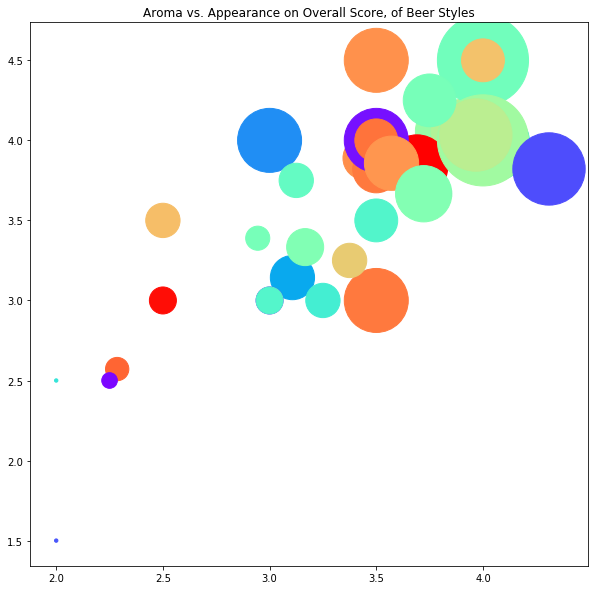

In [17]:
colors=cm.rainbow(np.random.rand(100))
plt.figure(figsize=(10,10))
plt.scatter(x = output['review_aroma'],
            y = output['review_appearance'],
            s = output['review_overall'] ** 6, # size to show differences in ratings, doesn't appear to be much
            color=colors)
plt.title("Aroma vs. Appearance on Overall Score, of Beer Styles")
plt.show()

### Q4B: I'm curious - do prettier beer bottles get significantly higher scores and more reviews too?

#### Well yeah definitely! Bottles with highest appearance scores (vertical axis of graph) also tend to have best scores (horizontal axis) and most reviews (largest bubble size). 

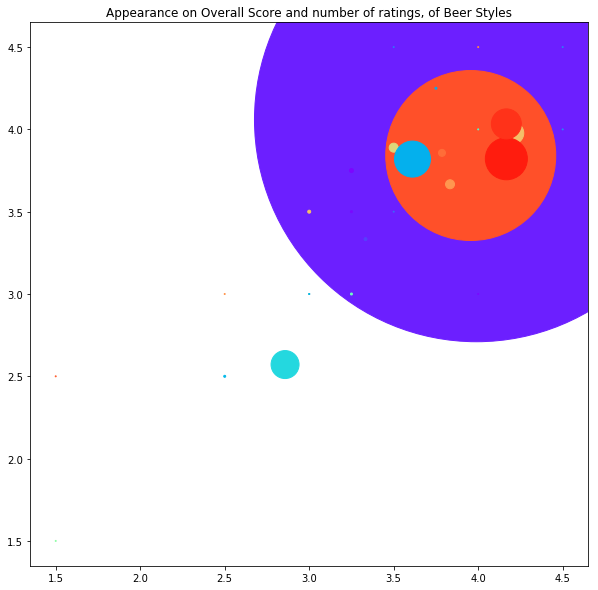

In [18]:
colors=cm.rainbow(np.random.rand(100))
plt.figure(figsize=(10,10))
plt.scatter(x = output['review_overall'],
            y = output['review_appearance'],
            s = output['beer_name'] ** 2, # size to show differences in ratings, doesn't appear to be much
            color=colors)
plt.title("Appearance on Overall Score and number of ratings, of Beer Styles")
plt.show()

# Now for the original question - Which beer style should I try?

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\valeriehy.lim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# full file not run cos it's huge and my computer runs slower than a snail
smallfile = file[0:10000]

# improve readaility
dependent = smallfile[['review_aroma', 'review_appearance']]
independent = smallfile['beer_style']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dependent, independent, test_size=0.1)
lr = LogisticRegression(multi_class='multinomial', solver ='newton-cg')
lr.fit(X_train, y_train)
data_test = pd.DataFrame(data=X_test, columns = ['f{}'.format(i) for i in range(1, 11)])
data_test['y_test'] = y_test
data_test['y_pred'] = lr.predict(X_test)

# print accuracy
accuracy = data_test.loc[data_test['y_test'] == data_test['y_pred']]
print("Accuracy of logistic regression model: ", len(accuracy)/len(data_test)*100, "%")

Accuracy of logistic regression model:  22.3 %


# Perhaps the multinomial model isn't predicting well because of noise. How much noise is there?

In [22]:
# Types of beer
len(file['beer_style'].value_counts())

104

In [23]:
# Number of reviews of each:
file['beer_style'].value_counts().tail(10)

Lambic - Unblended                 1114
Sahti                              1061
Bière de Champagne / Bière Brut    1046
Braggot                            1040
English Pale Mild Ale               700
Gose                                686
Faro                                609
Roggenbier                          466
Kvass                               297
Happoshu                            241
Name: beer_style, dtype: int64

#### Answer: A lot of noise.

#### We have 104 beer styles here, from 1.5M observations. However, the observations are not equally distributed as we saw above. The lowest categories (~1,000 reviews) have less than 0.0006% occurence.

# Let's select only the best beers from the top 10 most popular categories.


In [24]:
# Count beers
beer_counts = file.groupby('beer_style').aggregate({'review_overall': 'count'})
x = beer_counts.head(10) 

# OR, to filter for reviews > 10 000 instead, run this:
# x = beer_counts[beer_counts['review_overall'] > 10000] 

x.reset_index(level=0, inplace=True) 
top_beers = x['beer_style'].tolist()
filtered = file[file['beer_style'].isin(top_beers)]

In [25]:
# make df
dependent = filtered[['review_aroma', 'review_appearance']]
independent = filtered['beer_style']
X_train, X_test, y_train, y_test = train_test_split(dependent, independent, test_size=0.1)

# build log reg model
lr = LogisticRegression(multi_class='multinomial', solver ='newton-cg')
lr.fit(X_train, y_train)
data_test = pd.DataFrame(data=X_test, columns = ['f{}'.format(i) for i in range(1, 11)])
data_test['y_test'] = y_test
data_test['y_pred'] = lr.predict(X_test)

# print accuracy
accuracy = data_test.loc[data_test['y_test'] == data_test['y_pred']]
print("Accuracy of logistic regression model: ", len(accuracy)/len(data_test)*100, "%")

Accuracy of logistic regression model:  43.73639191290824 %


#### The accuracy is still pretty low.

#### This could be due to several reasons about the nature of the data and the question asked. I'll discuss my statistical assumptions in the reflections on this test below (section 5).

# Moving forward, rather than use a logistic predictor model, I'd take a simple approach to find the best style of beer for someone who likes aroma and appearance. 

# I'm guessing they'd just want to find the best style with the highest rated aroma (ranked first) and then appearance (ranked second). 

In [26]:
output = file.groupby('beer_style').aggregate({'review_aroma':'mean', 'review_appearance': 'mean'}).sort_values(['review_aroma', 'review_appearance'], ascending=[False, False])
output.head(5)

,review_aroma,review_appearance
beer_style,,
American Double / Imperial Stout,4.160665,4.163633
Eisbock,4.156778,3.964514
Quadrupel (Quad),4.132533,4.117964
American Wild Ale,4.126756,4.005451
Lambic - Unblended,4.118043,3.912478


![alt-text](http://www.taptrail.com/wp-content/uploads/2015/10/ImpyStoutHeader1.jpg)

# Answer: For someone who enjoys the Aroma and the Appearance of their beer, I'd recommend the American Double/ Imperial Stout style. 

--------

# 5: Reflections & Assumptions

While I'm dissatisfied that the data couldn't fit well into a logistic regression model for the last question, I think that this might be due to some aspects of the nature of this question:

* High collinearity between the target variables in question (see table below, r > 0.5 for critical variables)
* Too few target variables included within scope, always helps to allow more predictor variables :)
* Too many nominal categories (>104) to predict for given the low probability of occurence for each
* Weak linearity of independent variables with log odds

In [28]:
dependent.corr()

,review_aroma,review_appearance
review_aroma,1.000000,0.656671
review_appearance,0.656671,1.000000


Overall, while I'm not sure if this question is asking me to build a classifier model, or to find the best category given two dimensions, I attempted both tasks and I hope I demonstrated what the test was looking for.


# Overall, I really enjoyed this test and the story-telling opportunity that came with it! The data was fun to play with. I hope whoever who reviewing this has enjoyed reading it too. Thank you!

Completed: 14th Feb 2018.